# Exercise
## You are given, as the train data, trn_x and trn_y along with their class labels trn_x_class and trn_y_class. The task is to classify the following TEST data.


First we load the data from the text files

In [3]:
# ###################################
# Group ID : 501
# Members : Villiam Østergaard Brøkner, Frederik Horn-petersen, Nelson Bejarano, Ioritz Iribar, Danel Madrazo
# Date : 12-09-2025
# Lecture: 2 - Bayesian decision theory + Parametric and nonparametric methods
# Dependencies: numpy, scipy, matplotlib
# Python version: 3.12
# Functionality: Implementation of Bayesian decision theory for a two-class classification problem.
# ###################################


In [4]:
# This cell ensures required packages are installed when the notebook is run.
import sys, subprocess
required = ['pandas','seaborn','matplotlib','scipy','statsmodels','scikit-learn']
missing = []
for pkg in required:
    try:
        __import__(pkg)
    except Exception:
        missing.append(pkg)
if missing:
    print('Installing missing packages:', missing)
    subprocess.check_call([sys.executable, '-m', 'pip', 'install'] + missing)
else:
    print('All required packages already installed.')
# quick verification
import pandas as pd
print('pandas', pd.__version__, 'python', sys.executable)


Installing missing packages: ['pandas', 'seaborn', 'statsmodels', 'scikit-learn']
pandas 2.3.3 python c:\Users\nbeja\Desktop\Semester 1\ML\Lecture_2_501\.venv\Scripts\python.exe


In [7]:
import numpy as np

# Train data
train_x = np.loadtxt("dataset1_G_noisy_ASCII/trn_x.txt")
train_x_label = np.loadtxt("dataset1_G_noisy_ASCII/trn_x_class.txt")

train_y = np.loadtxt("dataset1_G_noisy_ASCII/trn_y.txt")
train_y_label = np.loadtxt("dataset1_G_noisy_ASCII/trn_y_class.txt")

# Test data
test_x = np.loadtxt("dataset1_G_noisy_ASCII/tst_x.txt")
test_x_label = np.loadtxt("dataset1_G_noisy_ASCII/tst_x_class.txt")

test_y = np.loadtxt("dataset1_G_noisy_ASCII/tst_y.txt")
test_y_label = np.loadtxt("dataset1_G_noisy_ASCII/tst_y_class.txt")

test_y_126 = np.loadtxt("dataset1_G_noisy_ASCII/tst_y_126.txt")
test_y_126_label = np.loadtxt("dataset1_G_noisy_ASCII/tst_y_126_class.txt")

test_xy = np.loadtxt("dataset1_G_noisy_ASCII/tst_xy.txt")
test_xy_label = np.loadtxt("dataset1_G_noisy_ASCII/tst_xy_class.txt")

test_xy_126 = np.loadtxt("dataset1_G_noisy_ASCII/tst_xy_126.txt")
test_xy_126_label = np.loadtxt("dataset1_G_noisy_ASCII/tst_xy_126_class.txt")

Looking at the data we see that our input features is 2-dimensional, i.e., it has two values per data point.
Furthermore, x has label 1 and y has label 2.

Let's visualize the training data by plotting a 2D scatter plot and corresponding Gaussians for class x and class y

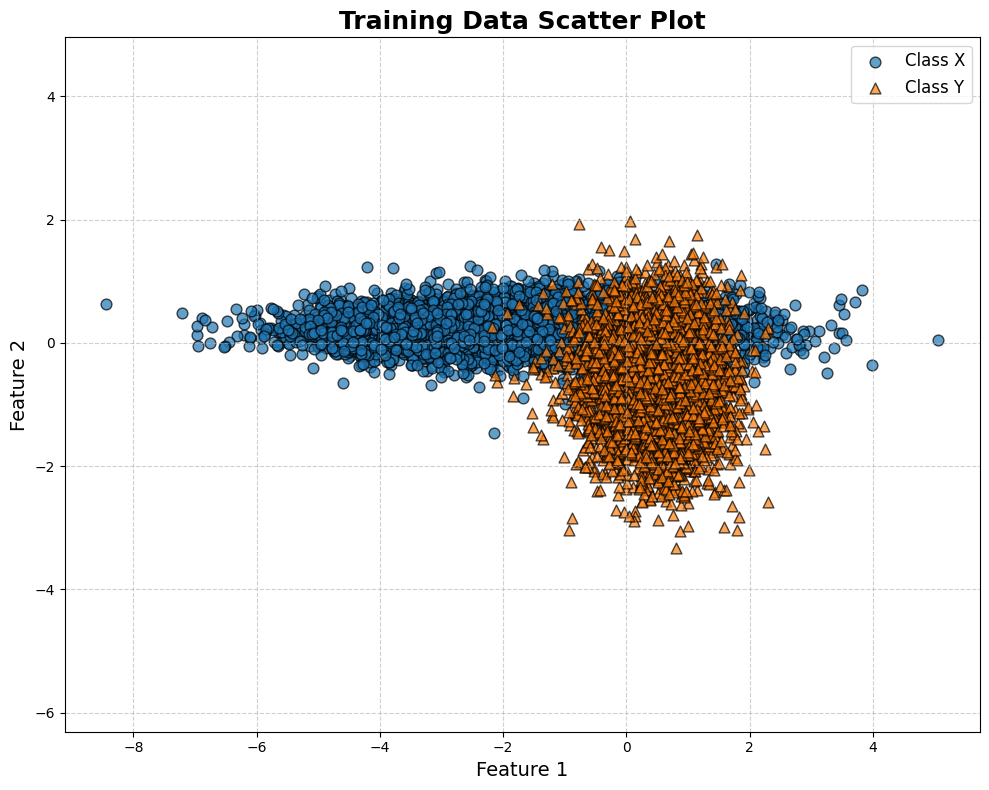

In [9]:
# Hint: look at: https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(10, 8))

# Scatter plot for each class with distinct colors and markers
plt.scatter(train_x[:, 0], train_x[:, 1], 
            label='Class X', 
            alpha=0.7, 
            c='#1f77b4',  # nice blue
            edgecolor='k',
            s=60, marker='o')

plt.scatter(train_y[:, 0], train_y[:, 1], 
            label='Class Y', 
            alpha=0.7, 
            c='#ff7f0e',  # nice orange
            edgecolor='k',
            s=60, marker='^')

# Title and labels
plt.title('Training Data Scatter Plot', fontsize=18, weight='bold')
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# Grid, legend, and axis tweaks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, fontsize=12, loc='best')
plt.axis('equal')  # keep aspect ratio if features are comparable
plt.tight_layout()

# Show plot
plt.show()


### (a) classify instances in tst_xy, and use the corresponding label file tst_xy_class to calculate the accuracy;

First we compute the statistics of x and y (use np.mean and np.cov)

In [5]:
# x statistics
train_x_mean = np.mean(train_x, axis=0)
train_x_cov = np.cov(train_x, rowvar=False)

# y statistics
train_y_mean = np.mean(train_y, axis=0)
train_y_cov = np.cov(train_y, rowvar=False)

# priors
#prior_x = len(train_x_label == 1) / (len(train_x_label)+len(train_y_label))
#prior_y = len(train_y_label == 2) / (len(train_x_label)+len(train_y_label))
prior_x = np.sum(train_x_label == 1) / (len(train_x_label) + len(train_y_label))
prior_y = np.sum(train_y_label == 2) / (len(train_x_label) + len(train_y_label))

print(f"Prior x: {prior_x:.2f}, Prior y: {prior_y:.2f}")

Prior x: 0.55, Prior y: 0.45


Now we need to a function for computing the likelihood of x and y given our test data.

In [6]:
# Define likelihood function
# Implement your own or look on stack overflow if you are lazy - most important thing is that you understand what is going on
import scipy.stats as stats

def likelihood(data, mean, cov):
    likelihood_value = stats.multivariate_normal.pdf(data, mean=mean, cov=cov)
    return likelihood_value

To classify the test data we compute the likelihood of it being class x and class y

In [147]:
# Compute likelihood of x and y
likelihood_x = likelihood(test_xy, train_x_mean, train_x_cov)
likelihood_y = likelihood(test_xy, train_y_mean, train_y_cov)
print(f"Likelihood x:")
print(likelihood_x)
print(f"Likelihood y:")
print(likelihood_y)

Likelihood x:
[3.52557180e-01 3.38850025e-01 2.97951981e-01 ... 4.99911518e-04
 5.88685245e-09 5.64828675e-10]
Likelihood y:
[2.49252204e-05 6.24497823e-04 3.31549282e-02 ... 2.24627945e-02
 2.32001389e-01 1.07402862e-01]


We compute the posterior probability by taking the priors into account

In [148]:
# Compute posteriors from likelihood and prior
posterior_x = prior_x * likelihood_x
posterior_y = prior_y * likelihood_y
print(f"Posterior x:")
print(posterior_x)
print(f"Posterior y:")
print(posterior_y)

Posterior x:
[1.95423868e-01 1.87825937e-01 1.65155986e-01 ... 2.77102972e-04
 3.26310608e-09 3.13086815e-10]
Posterior y:
[1.11090701e-05 2.78336159e-04 1.47770177e-02 ... 1.00115768e-02
 1.03402083e-01 4.78690219e-02]


Now choose to classify our test data as belonging to the class with the highest posterior probability

In [149]:
# Remember that labels for x and y are are 1 and 2 respectively
classification = np.zeros(len(test_xy_label))
for i in range(len(test_xy_label)):
    if posterior_x[i] > posterior_y[i]:
        classification[i] = 1
    else:
        classification[i] = 2

We can compute the accuracy of our classifications by taking the sum of correct predictions and divide by the total number of predictions

In [150]:
accuracy_xy = (classification == test_xy_label).sum() / len(test_xy_label)
print(f"Accuracy on test_xy: {accuracy_xy*100:.2f}%")

Accuracy on test_xy: 90.92%


### (b) classify instances in tst_xy_126 by assuming a uniform prior over the space of hypotheses, and use the corresponding label file tst_xy_126_class to calculate the accuracy;

First we define our prior probabilities

In [151]:
prior_x_uniform = 0.5
prior_y_uniform = 0.5

We can now compute posteriors knowing that the posterior probability is simply the prior, p(C), multiplied by the likelihood p(x, C).

In [152]:
likelihood_x_uniform = likelihood(test_xy_126, train_x_mean, train_x_cov)
likelihood_y_uniform = likelihood(test_xy_126, train_y_mean, train_y_cov)

posterior_x_uniform = likelihood_x_uniform * prior_x_uniform
posterior_y_uniform = likelihood_y_uniform * prior_y_uniform
print(f"Posterior x uniform prior:")
print(posterior_x_uniform)
print(f"Posterior y uniform prior:")
print(posterior_y_uniform)

Posterior x uniform prior:
[1.76278590e-01 1.69425012e-01 1.48975991e-01 ... 1.80239996e-05
 3.49540136e-06 1.22215315e-02]
Posterior y uniform prior:
[1.24626102e-05 3.12248911e-04 1.65774641e-02 ... 1.16559256e-01
 9.09949007e-02 1.39017322e-01]


Now that we have posteriors for both x and y we can classify the test data and compute the accuracy

In [153]:
classification_uniform = np.zeros(len(test_xy_126_label))
for i in range(len(test_xy_126_label)):
    if posterior_x_uniform[i] > posterior_y_uniform[i]:
        classification_uniform[i] = 1
    else:
        classification_uniform[i] = 2

accuracy_xy_126_uniform = (classification_uniform == test_xy_126_label).sum() / len(test_xy_126_label)
print(f"Accuracy using uniform prior {accuracy_xy_126_uniform*100:.2f}%")

Accuracy using uniform prior 88.82%


### (c) classify instances in tst_xy_126 by assuming a prior probability of 0.9 for Class x and 0.1 for Class y, and use the corresponding label file tst_xy_126_class to calculate the accuracy; compare the results with those of (b).

Here we simply follow the procedure of (b), however, this time with updated priors

In [154]:
prior_x_non_uniform = 0.9
prior_y_non_uniform = 0.1

likelihood_x_non_uniform = likelihood(test_xy_126, train_x_mean, train_x_cov)
likelihood_y_non_uniform = likelihood(test_xy_126, train_y_mean, train_y_cov)
posterior_x_non_uniform = prior_x_non_uniform * likelihood_x_non_uniform
posterior_y_non_uniform = prior_y_non_uniform * likelihood_y_non_uniform

classification_non_uniform = np.zeros(len(test_xy_126_label))
for i in range(len(test_xy_126_label)):
    if posterior_x_non_uniform[i] > posterior_y_non_uniform[i]:
        classification_non_uniform[i] = 1
    else:
        classification_non_uniform[i] = 2

accuracy_xy_126_non_uniform = (classification_non_uniform == test_xy_126_label).sum() / len(test_xy_126_label)

print(f"Accuracy using non-uniform prior {accuracy_xy_126_non_uniform*100:.2f}%")

Accuracy using non-uniform prior 96.27%


Comparing the accuracy using uniform prior and non-uniform priors we see that using prior information about the data distribution improves classifcation accuracy by ?%.

In [155]:
improvement = (accuracy_xy_126_non_uniform / accuracy_xy_126_uniform) - 1
print(f"Absolute improvement in accuracy {improvement*100:.2f}%")

Absolute improvement in accuracy 8.39%
